In [1]:
import os,sys
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append("../src")  # adjust path as needed
from feature_engineering import Feature_selection


In [2]:
input_path = '/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/fomatted_data/Updated/'
data = pd.read_csv(input_path + 'gene_matrix1.csv')

In [3]:
X_data = data.drop(columns=["PATNO", "EVENT_ID", "NHY"])
Y_data = data["NHY"]
sparsity = (X_data == 0).mean().mean()
print(f"Sparsity: {sparsity:.2%}")

Sparsity: 33.94%


In [4]:
cls_initiate_kbest = Feature_selection(data, grouped_y=True,
                selection_method='kbest', 
                k = 100)

gene_list = cls_initiate_kbest.select_features()

Sparsity: 33.94%


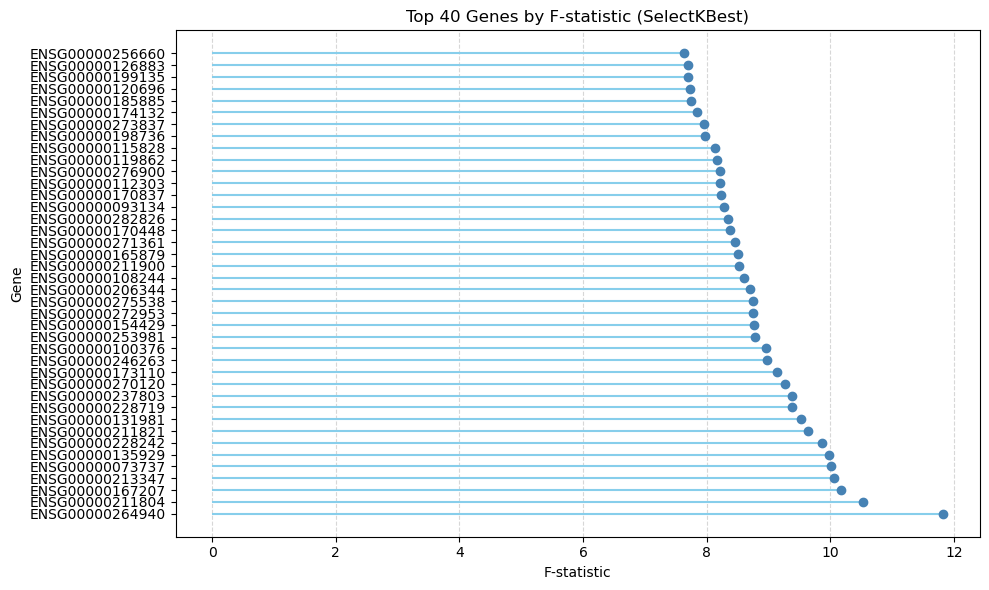

In [8]:
cls_initiate_kbest.plot_top_genes_lollipop(top_n=40)

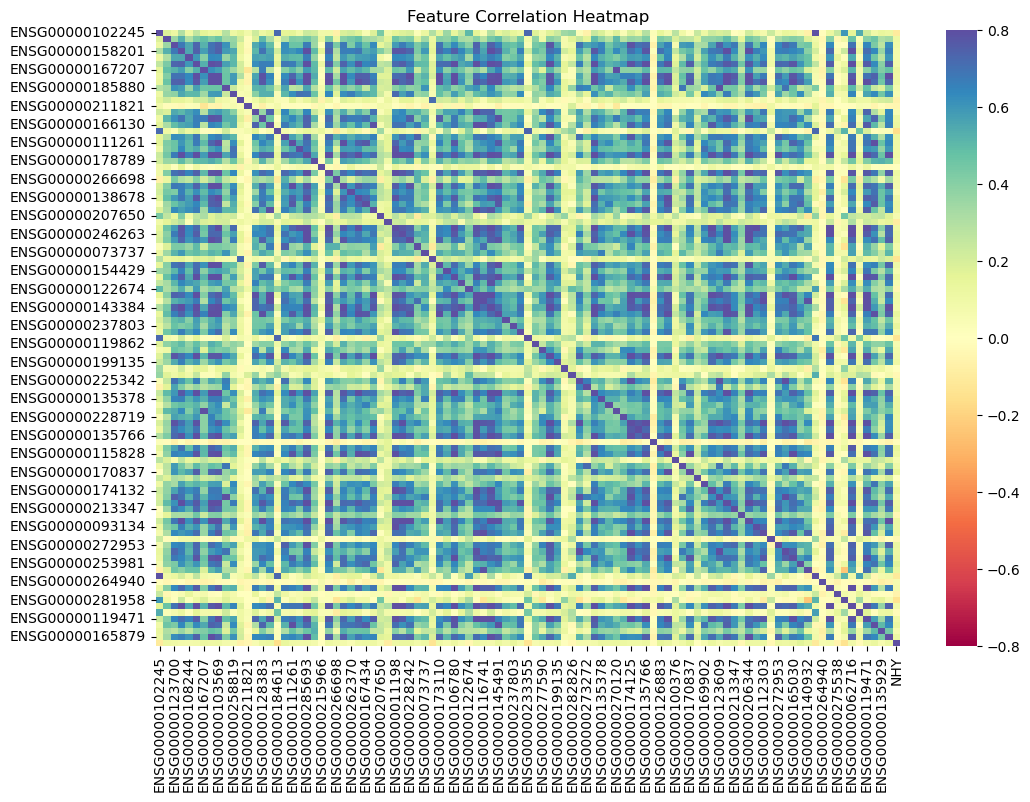

In [14]:
plt.figure(figsize=(12, 8))
list_load = gene_list + ["NHY"]
sns.heatmap(data[list_load].corr(numeric_only=True), cmap='Spectral', annot=False, vmin=-0.8, vmax=0.8)
plt.title("Feature Correlation Heatmap")
plt.show()

In [15]:
sns.barplot(data=data[list_load], x='F_score', y='gene', palette='viridis')

ValueError: Could not interpret value `F_score` for `x`. An entry with this name does not appear in `data`.

In [ ]:
corr_matrix = X_data[gene_list].corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

# Drop those columns
X_deduplicated = X_data[gene_list].drop(columns=to_drop)

print(f"Removed {len(to_drop)} highly correlated genes.")

Removed 0 highly correlated genes.


In [13]:
print(selected_genes.tolist())
path = '/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/'
output_datapath = path + 'fomatted_data/Updated/with_clinical_data'

output_path_geneID = os.path.join(output_datapath, "geneID_feature_selection_50.csv")
f_scores_df_sorted.to_csv(output_path_geneID, index=False)

['ENSG00000102145', 'ENSG00000184792', 'ENSG00000244482', 'ENSG00000105281', 'ENSG00000104892', 'ENSG00000090013', 'ENSG00000158578', 'ENSG00000105610', 'ENSG00000167815', 'ENSG00000095932', 'ENSG00000118046', 'ENSG00000099804', 'ENSG00000066926', 'ENSG00000011028', 'ENSG00000172057', 'ENSG00000100225', 'ENSG00000108405', 'ENSG00000169877', 'ENSG00000067836', 'ENSG00000180185', 'ENSG00000063854', 'ENSG00000156381', 'ENSG00000182512', 'ENSG00000119636', 'ENSG00000100568', 'ENSG00000129472', 'ENSG00000198805', 'ENSG00000102760', 'ENSG00000152484', 'ENSG00000173598', 'ENSG00000111726', 'ENSG00000204323', 'ENSG00000149212', 'ENSG00000263465', 'ENSG00000166435', 'ENSG00000110046', 'ENSG00000052802', 'ENSG00000189060', 'ENSG00000232021', 'ENSG00000163993', 'ENSG00000145335', 'ENSG00000113811', 'ENSG00000214706', 'ENSG00000181788', 'ENSG00000168785', 'ENSG00000231621', 'ENSG00000165929', 'ENSG00000167705', 'ENSG00000249667', 'ENSG00000204613', 'ENSG00000238243', 'ENSG00000132819', 'ENSG000001

### Selecting the clinical data

/var/folders/0v/kl9fb13d2v51vwxc37zr5__00000gn/T/ipykernel_14619/1237848357.py:2: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(path1+'/MDS-UPDRS_Part_III_03Jun2025.csv')
/var/folders/0v/kl9fb13d2v51vwxc37zr5__00000gn/T/ipykernel_14619/1237848357.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_common, x='GENDER', palette='inferno', edgecolor='black')


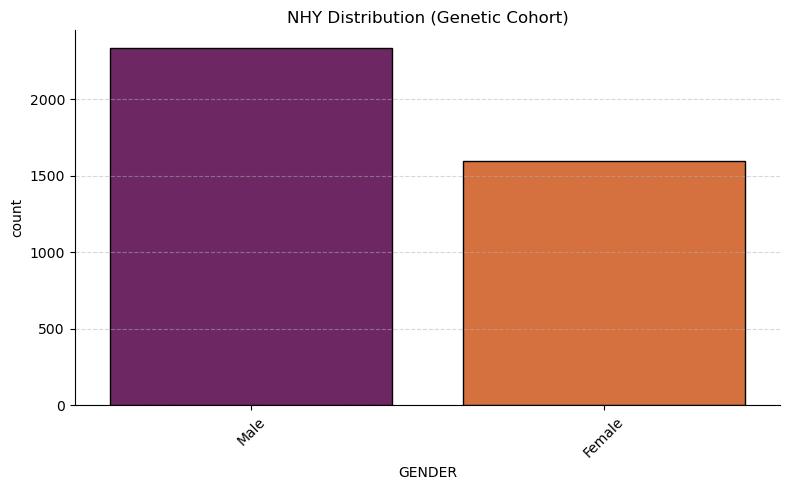

In [14]:
path1 = '/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/Diagnosis_History_UPDRS_HYS/'
df1 = pd.read_csv(path1+'/MDS-UPDRS_Part_III_03Jun2025.csv')
# Load your metadata CSV
path2 = '/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/Gene_expression'
df2 = pd.read_csv(path2+'/metaDataIR3.csv')

df_bl = df2[(df2['CLINICAL_EVENT'] == 'BL') & (df2['DIAGNOSIS'] == 'Genetic Cohort') | 
            (df2['CLINICAL_EVENT'] == 'BL') & (df2['DIAGNOSIS'] == 'PD') | 
            (df2['CLINICAL_EVENT'] == 'BL') & (df2['DIAGNOSIS'] == 'Control') |
            (df2['CLINICAL_EVENT'] == 'BL') & (df2['DIAGNOSIS'] == 'Prodromal')]
patno_bl = set(df_bl['PATNO'])
patno_other = set(df1['PATNO'])

common_patnos = patno_bl.intersection(patno_other)

df_common = df2[df2['PATNO'].isin(common_patnos)]
# df_unique = df_common.sort_values('ORIG_ENTRY').drop_duplicates(subset='PATNO', keep='last')

# Plot histogram
plt.figure(figsize=(8, 5))
sns.countplot(data=df_common, x='GENDER', palette='inferno', edgecolor='black')
plt.title('NHY Distribution (Genetic Cohort)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

##### Write the final .csv file

In [15]:
#instiantiate the reading class
path = '/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/'

input_path = path
output_path = path + 'fomatted_data/Updated/gene_datas_'
data = ReadData(data_path=input_path, output_path=output_path, gene_list=selected_genes.to_list(), 
                write_csv=1, phaseIandII=1, genetic_cohort=1,clinical_data=1)

genedata_all,unmatchedkeys = data.gene_expression(match_event=False)

/Users/pushpita/Documents/Erdos_bootcamp/our_project/code_repo/notebooks/../src/all/read_Parkinsonpredict.py:87: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  HYS_data = pd.read_csv(HYS_data_path+"MDS-UPDRS_Part_III_03Jun2025.csv")
/Users/pushpita/Documents/Erdos_bootcamp/our_project/code_repo/notebooks/../src/all/read_Parkinsonpredict.py:222: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gene_counts_df = pd.concat([gene_counts_df, pd.DataFrame([my_row], columns=gene_counts_df.columns)], ignore_index=True)


4756


/Users/pushpita/Documents/Erdos_bootcamp/our_project/code_repo/notebooks/../src/all/read_Parkinsonpredict.py:222: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gene_counts_df = pd.concat([gene_counts_df, pd.DataFrame([my_row], columns=gene_counts_df.columns)], ignore_index=True)
/Users/pushpita/Documents/Erdos_bootcamp/our_project/code_repo/notebooks/../src/all/read_Parkinsonpredict.py:222: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gene_counts_df = pd.concat([gene_counts_df, pd.DataFrame([my

Total matched gene files with valid PATNO/EVENT_ID pairs: 3899
